# Explore Data

useful link of howto to read and understand the file.ntuple.root structure: https://snopl.us/docs/rat/user_manual/html/standard_ntuples.html

### Useful variable for the analysis

- scintFit -> To select well reconstructed energy and position events;
- mcIndex -> To follow up each event;
- MC postion -> MC vertex coordinates;
- reconstructed postion -> reconstructed vertex position;
##### Use the MC position and recons. position ot measure the space difference between the IBD vertices of promt and delayed, and then compare the MC diference with the recons. difference histograms. PROBLEM: In the dataset there is not posr1 and posr2 for both n and beta particles ...
- reconstructed energy -> to select events within energy of interest;
- clockCount50 -> to meature time intervale between prompt and delayed events;

In [1]:
import numpy as np
import uproot

import matplotlib.pyplot as plt
import seaborn as sn

import pandas as pd

In [3]:
a = np.array([[1,2],[3,4], [5,6]])
a.shape

(3, 2)

In [9]:
def pos_r(x, y, z):
    #function to recompute the radius of events due to the posz correction given the x, y and z position
    r = np.sqrt(x**2 + y**2 + z**2)
    return r

In [10]:
file = uproot.open('/snoplus simulations/reactor_nu/ScintFit_2p2ReactoribdRun_r304956_s0_p2.ntuple.root')
file.keys()

['output;1', 'meta;1']

In [11]:
output = file['output;1']
output.keys()
#fitValid - good postion reconstruction
#scintFit - good position and energy reconstruction

['runID',
 'ratversion',
 'mcIndex',
 'evIndex',
 'mc',
 'eventID',
 'pdg1',
 'pdg2',
 'parentpdg1',
 'parentpdg2',
 'parentKE1',
 'parentKE2',
 'parentMeta1',
 'parentMeta2',
 'mcke1',
 'mcke2',
 'mcmom1x',
 'mcmom1y',
 'mcmom1z',
 'mcmom2x',
 'mcmom2y',
 'mcmom2z',
 'mctime1',
 'mctime2',
 'mct',
 'mcEdep',
 'mcEdepQuenched',
 'mcNCherPhotons',
 'mcPosx',
 'mcPosy',
 'mcPosz',
 'mcPosr',
 'nhits',
 'owlnhits',
 'necknhits',
 'nhitsCleaned',
 'correctedNhits',
 'inTimeHits100',
 'inTimeHits20',
 'isCal',
 'fecdHits',
 'q',
 'triggerWord',
 'tubiiWord',
 'dcApplied',
 'dcFlagged',
 'clockCount10',
 'clockCount50',
 'uTDays',
 'uTSecs',
 'uTNSecs',
 'scintFit',
 'waterFit',
 'partialWaterFit',
 'partialFit',
 'posx_MultiPath',
 'posy_MultiPath',
 'posz_MultiPath',
 'posr_MultiPath',
 'time_MultiPath',
 'posz_fastZ',
 'time_fastZ',
 'fitValid',
 'fitValidityMask',
 'fitValid_MultiPath',
 'fitValid_fastZ',
 'posx',
 'posxPosError',
 'posxNegError',
 'posy',
 'posyPosError',
 'posyNegError

## 1 - Extract useful variables

In [5]:
runID = np.array(output['runID'])
runID

array([304956, 304956, 304956, ..., 304956, 304956, 304956])

In [12]:
neck_nhits = np.array(output['necknhits'])
neck_nhits

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
dc_flag = np.array(output['dcFlagged'])
dc_flag

array([846074198065021, 846074198064990, 846074198063998, ...,
       846074198064990, 846074198065022, 846074198064990], dtype=uint64)

In [9]:
int(0x2100000042C2)

36283883733698

In [7]:
#validation info
scint_fit = np.array(output['scintFit'])
fit_valid = np.array(output['fitValid'])

condition = (scint_fit & fit_valid)

#event Index
evIndex = np.array(output['evIndex'])  #evIndex = 0 is prompt, and evIndex > 0 is delayed and tails of prompt and delayed

#recons. energy
energy = np.array(output['energy'])

#recons. position
posx = np.array(output['posx'])
posy = np.array(output['posy'])
posz = np.array(output['posz']) - 184.4
posr = pos_r(posx, posy, posz)

#MC info
mcID = np.array(output['mcIndex'])
mc_posx = np.array(output['mcPosx'])
mc_posy = np.array(output['mcPosy'])
mc_posz = np.array(output['mcPosz'])
mc_posr = np.array(output['mcPosr'])

# Time info
clock_count50 = np.array(output['clockCount50'], dtype = np.int64)

#ev info
evID = np.array(output['eventID'])
nhits = np.array(output['nhits'])

# Extract valid info -> Valid scint_fit -------------

evIndex = np.extract(scint_fit, evIndex)

mc_posx = np.extract(scint_fit, mc_posx)
mc_posy = np.extract(scint_fit, mc_posy)
mc_posz = np.extract(scint_fit, mc_posz)

posx = np.extract(scint_fit, posx)
posy = np.extract(scint_fit, posy)
posz = np.extract(scint_fit, posz)
posr = np.extract(scint_fit, posr)

time = np.extract(scint_fit, (clock_count50*20)/1000)  #convert ns to μs

evID = np.extract(scint_fit, evID)

energy = np.extract(scint_fit, energy)

In [13]:
time

array([4.23114206e+10, 4.23114206e+10, 4.23114208e+10, ...,
       4.59092870e+10, 4.59092873e+10, 4.59092873e+10])

In [14]:
evIndex

array([0, 1, 2, ..., 1, 2, 3])

In [15]:
evID

array([   0,    1,    2, ..., 3935, 3936, 3937])

In [16]:
evID.shape

(3938,)

In [17]:
time

array([4.23114206e+10, 4.23114206e+10, 4.23114208e+10, ...,
       4.59092870e+10, 4.59092873e+10, 4.59092873e+10])

In [18]:
time.shape

(3938,)

In [19]:
energy

array([ 1.76703140e+00, -9.99990000e+04,  1.87130532e+00, ...,
       -9.99990000e+04,  2.20032246e+00, -9.99990000e+04])

In [20]:
energy.shape

(3938,)

In [21]:
posx

array([ 1587.01477051, -9488.67089844,  1443.8059082 , ...,
        1111.68493652,   -73.35767365,  1141.82128906])

In [22]:
posx.shape

(3938,)

PROBLEMAS:
1) Donde esta posr1 y posr2?
2) para medir Dt = (time1-time0)*20 definimos time0 = clockCount50, y time1?

SOLUCIÓN:
Podemos dividir cada IBD en 4 eventos: 
1) prompt
2) nail of prompt
3) delayed
4) nail of delayed

PROBLEMA CON ESTA SOLUCIÓN: Puedo estar mezclando prompts con delayed. Mejor usar eventIndex para separar los eventos

## 1.1 - Separation of prompt and delayed Energies with eventIndex

In [15]:
#Code to extract smartly the varibles of each eventIndex and to avoid the -9.999e+4 MeV values. However, this proceduce doesnt guarant the pair matching of prompt and delayed events ...

#prefix names of variables
prefix_en = 'energy_evin_'
#prefix_time = 'time_evin_'
#prefix_x = 'pos_x_evin_'
#prefix_y = 'pos_x_evin_'
#prefix_z = 'pos_x_evin_'

#index of variables
type_var = np.unique(evIndex)

energy_index_i = [] #array with the energies of each eventIndex
#time_index_i = []
#pos_x_index_i = []
#pos_y_index_i = []
#pos_z_index_i = []

for i in type_var:
    
    # select eventIndex and energy > 0
    condition = ((evIndex == i) & (energy > 0))
    
    locals()[prefix_en + str(i)] = np.extract(condition, energy)
    #locals()[prefix_time + str(i)] = np.extract(condition, time)
    #locals()[prefix_x + str(i)] = np.extract(condition, posx)
    #locals()[prefix_y + str(i)] = np.extract(condition, posy)
    #locals()[prefix_z + str(i)] = np.extract(condition, posz)

    # Save the observables of each evIndex within a list which indices are the list of results for each evIndex
    energy_index_i.append(locals()[prefix_en + str(i)])
    #time_index_i.append(locals()[prefix_time + str(i)])
    #pos_x_index_i.append(locals()[prefix_x + str(i)])
    #pos_y_index_i.append(locals()[prefix_y + str(i)])
    #pos_z_index_i.append(locals()[prefix_z + str(i)])

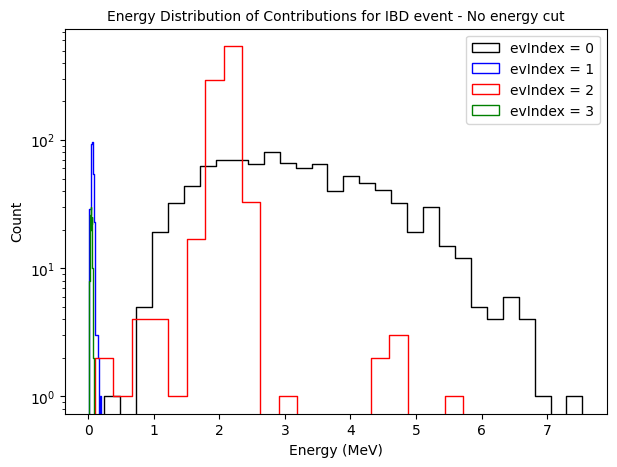

In [16]:
save_fig = True

plot_i = np.unique(evIndex)
color_i = ['black', 'b', 'r', 'g']
bins_i = [30, 10, 20, 15]

plt.figure(figsize=(7,5))

for i in plot_i:
    sn.histplot(energy_index_i[i], bins = bins_i[i], color = color_i[i], element = 'step', alpha = 0.0, label = 'evIndex = '+str(i))

plt.legend(loc = 'upper right')
plt.xlabel('Energy (MeV)')
plt.yscale('log')
plt.title('Energy Distribution of Contributions for IBD event - No energy cut', fontsize = 10)

if save_fig:
    plt.savefig('figs/Energy Distribution of Contributions for IBD event - No energy cut.png', format = 'png', bbox_inches = 'tight')
    
plt.show()

NOTES:
- The eventIndex 0 and 2 are the prompt and delayed simulated events;
- The eventIndex 1 and 3 are the residual energy of the prompt and delayed;
- The energy statistics of the delayed event is peaker relatively to the statistics of the prompt event
- An energy cut > 1 MeV should keep us away from tails of distributions

## 1.2 - Matching Prompt and Delayed

Lets guarant that we are keeping the correct pair of delayed events while performing cuts on data

In [23]:
# Look for the indices of the array elements that verifies evIndex 0 and 2. Guarant that we dont have the same consecutive values of evIndex, and then extract the correct indices of array elements
# for then extract the observables of interest.

ev_index_condition = (evIndex == 0) | (evIndex == 2) 

filter_index = np.where(ev_index_condition)[0]  # Indices which verifies the evIndex condition. Useful to look for the energy, time, and position of the desired prompt and delayed

test_evindex = evIndex[filter_index]  #This shows that even when we select the evIndex 0 and 2, there are consecutive records with 0 and 2. Lets remove this consecutive values following the rules:
                                     #1) if there is zero in i and i+1 indices, remove the i. 2) if there is twos in i and i+1, remove i+1.

index_to_del = []  #list of indicies of elements to be removed in filter_index. This is used to correct the filter_index list.

for i in range(len(test_evindex)-1):
    if test_evindex[i] == 0 and test_evindex[i+1] == 0:
        index_to_del.append(i)
    if test_evindex[i] == 2 and test_evindex[i+1] == 2:
        index_to_del.append(i+1)

filter_index = np.delete(filter_index, index_to_del)  #cleaning of the filter_index list

# Extract observables and Arange by pairs of prompt and delayed. If there is an error due to non-equal division, then set a condition for the filter_index:
evindex_filter = evIndex[filter_index].reshape((-1,2))
energy_filter = energy[filter_index].reshape((-1,2))
posr_filter = posr[filter_index].reshape((-1,2))
posx_filter = posx[filter_index].reshape((-1,2))
posy_filter = posy[filter_index].reshape((-1,2))
posz_filter = posz[filter_index].reshape((-1,2))
time_filter = time[filter_index].reshape((-1,2))

In [3]:
a = [1,2,3]
a[:-1]

[1, 2]

# 2 - Computation of Observables

In [24]:
# Now we are in conditions to apply cuts on energy and position of the events
en_cut = 1.0
r_cut = 5500

cut_condition = (energy_filter >= en_cut) & (posr_filter <= r_cut)

mask = np.all(cut_condition, axis = 1)  #evaluates where all the elements of axis 1 (rows) are True

#cut values of energy and postions
energy_cut = energy_filter[mask]
posr_cut = posr_filter[mask]
posx_cut = posx_filter[mask]
posy_cut = posy_filter[mask]
posz_cut = posz_filter[mask]
time_cut = time_filter[mask]

#extract the information of prompt and delayed
#Delta time
t0 = time_cut[:,0]
t1 = time_cut[:,1]
Dt = t1 - t0

#Delta r
posx_0 = posx_cut[:,0]
posy_0 = posy_cut[:,0]
posz_0 = posz_cut[:,0]

posx_1 = posx_cut[:,1]
posy_1 = posy_cut[:,1]
posz_1 = posz_cut[:,1]

dx = posx_1 - posx_0
dy = posy_1 - posy_0
dz = posz_1 - posz_0

Dr = np.sqrt((dx**2) + (dy**2) + (dz**2))

## 2.1 - Plots of Observables

<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\l'
C:\Users\joanc\AppData\Local\Temp\ipykernel_17600\583391243.py:17: SyntaxWarning: invalid escape sequence '\l'
  plt.suptitle(r'Reactor $\bar{\nu}$ - E $\geq$ ' + str(en_cut) + ' (MeV) & R $\leq$ '+ str(r_cut) + ' (mm)')


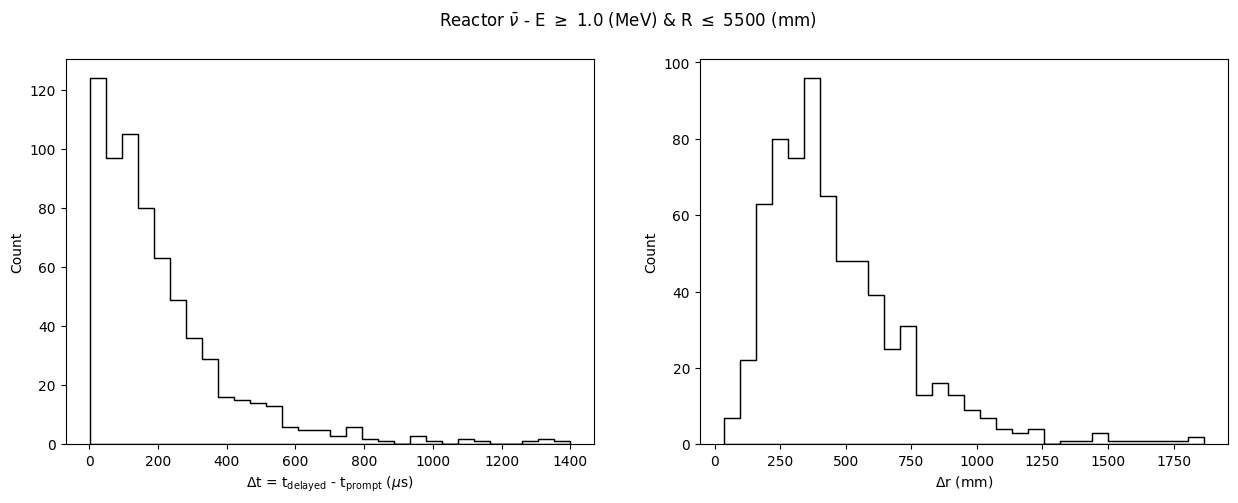

In [25]:
save_fig = True

bins_t = 30
bins_r = 30

linewidth = 1.05

fig, axes = plt.subplots(1, 2,  figsize=(15, 5))

sn.histplot(Dt, bins = bins_t, ax = axes[0], color = 'black', alpha = 0.0, element = 'step', linewidth = linewidth)
sn.histplot(Dr, bins = bins_r, ax = axes[1], color = 'black', alpha = 0.0, element = 'step' , linewidth = linewidth)

axes[0].set_xlabel(r'$\Delta$t = t$_{\text{delayed}}$ - t$_{\text{prompt}}$ ($\mu$s)')

axes[1].set_xlabel(r'$\Delta$r (mm)')

plt.suptitle(r'Reactor $\bar{\nu}$ - E $\geq$ ' + str(en_cut) + ' (MeV) & R $\leq$ '+ str(r_cut) + ' (mm)')

if save_fig:
    plt.savefig('figs/dt_dr_E_{i}MeV_R_{j}mm.png'.format(i = en_cut, j = r_cut), format = 'png', bbox_inches = 'tight')
    
plt.show()

# 3 - Save Informations of Observables in Pandas Dataframe

In [26]:
prompt_energy = energy_cut[:,0]
delayed_energy = energy_cut[:,1]

delta_t = Dt
delta_r = Dr

data_energy = {'Prompt Energy (MeV)': prompt_energy,
        'Delayed Energy (MeV)': delayed_energy
        }

data_delta = {'Delta t (mcs)': delta_t,
              'Delta r (mm)': delta_r
             }


pandas_data_energy = pd.DataFrame(data_energy)
pandas_data_delta = pd.DataFrame(data_delta)


pandas_data_energy.to_csv('data/energy_E_1mev_R_5500mm.csv')
pandas_data_delta.to_csv('data/delta_(t,r)_1mev_R_5500mm.csv')

In [27]:
pd.read_csv('data/delta_(t,r)_1mev_R_5500mm.csv')

,Unnamed: 0,Delta t (mcs),Delta r (mm)
0,0,327.500000,662.804452
1,1,63.000000,163.073634
2,2,979.299995,1145.159602
3,3,295.260002,570.227987
4,4,32.879997,321.679064
...,...,...,...
675,675,50.320000,391.835320
676,676,202.360001,235.587470
677,677,64.459999,345.363548
678,678,359.480003,700.739996


### *Observe the energy distribution just removing the atypical E values

It will be useful if one desires to preserve the ordering of the events, because the above analisis implies to combine events which may not correspondo to a complete anti-nu event. Thr idea is to, in first place, order the events without any cut, and then remove the atypical values from the data set once the events are ordered.

# 4 - Hight Statistical Analysis

In [2]:
new_data = False  #Turn true only to rewrite the full_data file!

import analysis_antinu
if new_data:
    analysis_antinu

import Dt_Dr
from Dt_Dr import Dt_Dr

reading file /snoplus simulations/reactor_nu\ScintFit_2p2ReactoribdRun_r300000_s0_p0.ntuple.root
reading file /snoplus simulations/reactor_nu\ScintFit_2p2ReactoribdRun_r300001_s0_p0.ntuple.root
reading file /snoplus simulations/reactor_nu\ScintFit_2p2ReactoribdRun_r300002_s0_p0.ntuple.root


C:\Users\joanc\jupyter notebooks\Antineutrino Analysis\Reactor nu\analysis_antinu.py:95: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_i], ignore_index=True)


reading file /snoplus simulations/reactor_nu\ScintFit_2p2ReactoribdRun_r300003_s0_p0.ntuple.root
reading file /snoplus simulations/reactor_nu\ScintFit_2p2ReactoribdRun_r300004_s0_p0.ntuple.root
reading file /snoplus simulations/reactor_nu\ScintFit_2p2ReactoribdRun_r300005_s0_p0.ntuple.root
reading file /snoplus simulations/reactor_nu\ScintFit_2p2ReactoribdRun_r300006_s0_p0.ntuple.root
reading file /snoplus simulations/reactor_nu\ScintFit_2p2ReactoribdRun_r300007_s0_p0.ntuple.root
reading file /snoplus simulations/reactor_nu\ScintFit_2p2ReactoribdRun_r300008_s0_p0.ntuple.root
reading file /snoplus simulations/reactor_nu\ScintFit_2p2ReactoribdRun_r300009_s0_p0.ntuple.root
reading file /snoplus simulations/reactor_nu\ScintFit_2p2ReactoribdRun_r300010_s0_p0.ntuple.root
reading file /snoplus simulations/reactor_nu\ScintFit_2p2ReactoribdRun_r300011_s0_p0.ntuple.root
reading file /snoplus simulations/reactor_nu\ScintFit_2p2ReactoribdRun_r300012_s0_p0.ntuple.root
reading file /snoplus simulati

In [3]:
en_cut = 0.8
r_cut = 5500

data = Dt_Dr(en_cut = en_cut, r_cut = r_cut)
data

,Dt (mcs),Dr (mm)
0,94.040009,269.208651
1,4.919983,368.764447
2,145.940002,286.222398
3,11.500000,199.386492
4,116.199982,851.859367
...,...,...
20476,50.320000,391.835320
20477,202.360001,235.587470
20478,64.459999,345.363548
20479,359.480003,700.739996


In [4]:
Dt = data['Dt (mcs)']
Dr = data['Dr (mm)']

<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
C:\Users\joanc\AppData\Local\Temp\ipykernel_11236\2906936229.py:19: SyntaxWarning: invalid escape sequence '\l'
  plt.suptitle(r'Reactor $\bar{\nu}$ - E $\geq$ ' + str(en_cut) + ' (MeV) & R $\leq$ '+ str(r_cut) + ' (mm)')


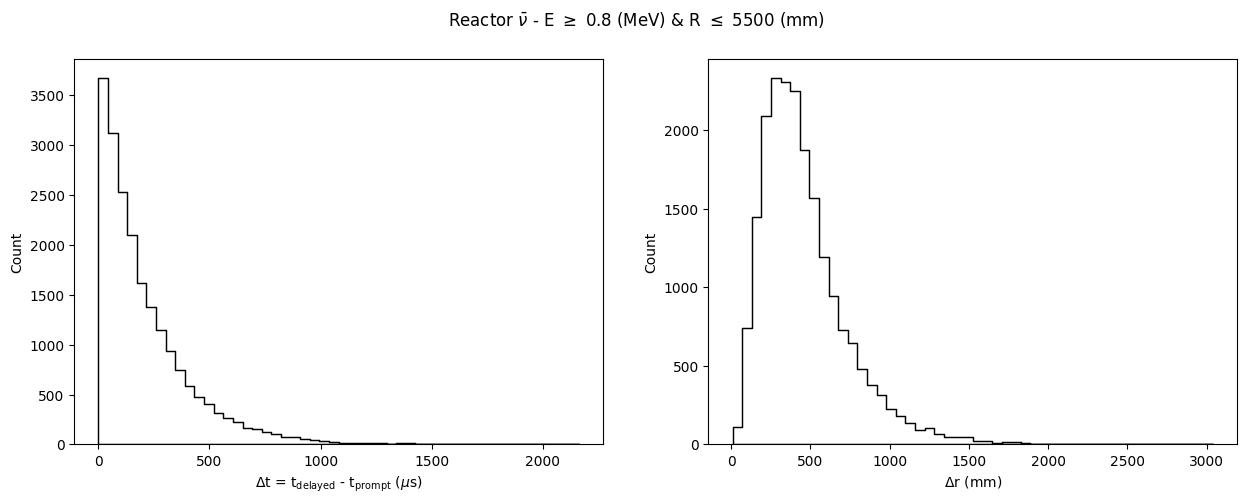

In [9]:
save_fig = True

bins_t = 50
bins_r = 50

linewidth = 1.05

fig, axes = plt.subplots(1, 2,  figsize=(15, 5))

sn.histplot(Dt, bins = bins_t, ax = axes[0], color = 'black', alpha = 0.0, element = 'step', linewidth = linewidth)
sn.histplot(Dr, bins = bins_r, ax = axes[1], color = 'black', alpha = 0.0, element = 'step' , linewidth = linewidth)

axes[0].set_xlabel(r'$\Delta$t = t$_{\text{delayed}}$ - t$_{\text{prompt}}$ ($\mu$s)')

axes[1].set_xlabel(r'$\Delta$r (mm)')
#axes[1].set_xlim(800,1400)
#axes[1].set_yscale('log')

plt.suptitle(r'Reactor $\bar{\nu}$ - E $\geq$ ' + str(en_cut) + ' (MeV) & R $\leq$ '+ str(r_cut) + ' (mm)')

if save_fig:
    plt.savefig('figs/dt_dr_E_{i}MeV_R_{j}mm.png'.format(i = en_cut, j = r_cut), format = 'png', bbox_inches = 'tight')
    
plt.show()

In [79]:
energy_test = energy.copy()

N_ev = 4 # Nº of desired events in each group
N_group = int(len(energy_test)/N_ev) # Nº of groups to be created. Nº of splits.

#The following avoid the error of non-equal divided arrays. So lets delete the latest events which cannot by sort to a group of 4 records.

limiter = True
while limiter:
    
    try:
        energy_group = np.split(energy_test, N_group)
        
    except ValueError:
        print('Eliminating elements which are not short ar 4 elements by group')
        energy_test = np.delete(energy_test, -1)
        
    else:
        limiter = False

energy_group = np.array(energy_group)

Eliminating elements which are not short ar 4 elements by group
Eliminating elements which are not short ar 4 elements by group


In [80]:
energy_group

array([[ 1.76703140e+00, -9.99990000e+04,  1.87130532e+00,
        -9.99990000e+04],
       [ 5.56501013e+00,  6.00208299e-02,  2.22836997e+00,
         3.74664342e-02],
       [ 4.50908144e+00, -9.99990000e+04, -9.99990000e+04,
         2.20794576e+00],
       ...,
       [ 2.12960728e+00,  3.48557183e-02,  2.04057777e+00,
        -9.99990000e+04],
       [ 2.24164492e+00, -9.99990000e+04,  3.36224362e+00,
        -9.99990000e+04],
       [ 2.18170017e+00, -9.99990000e+04,  3.12696786e+00,
        -9.99990000e+04]])

In [81]:
prompt_condition = (energy_group[:,0] >= 0.8)
delay_condition = (energy_group[:,2] >= 0.8)

E_prompt = np.extract(prompt_condition, energy_group[:,0])
E_delay = np.extract(delay_condition, energy_group[:,2])

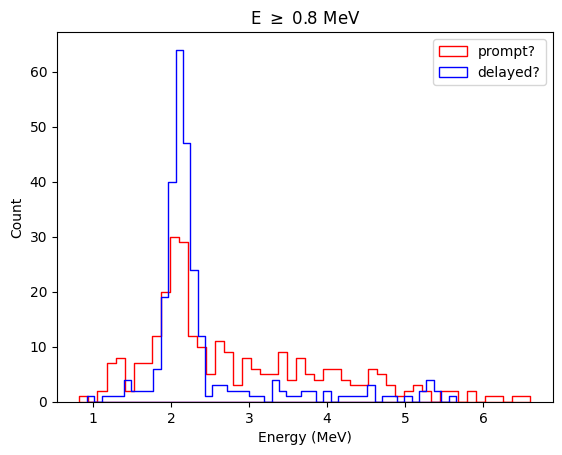

In [88]:
sn.histplot(E_prompt, bins = 50, color = 'r', element = 'step', alpha = 0, label = 'prompt?')
sn.histplot(E_delay, bins = 50, color = 'b', element = 'step', alpha = 0, label = 'delayed?')
plt.legend(loc='upper right')
plt.xlabel('Energy (MeV)')
plt.title(r'E $\geq$ 0.8 MeV')
plt.show()

In [59]:
arr = np.load('E:/Data/antinu/mc/reactor_nu/out_results/output_0/energy_prompt.npy')

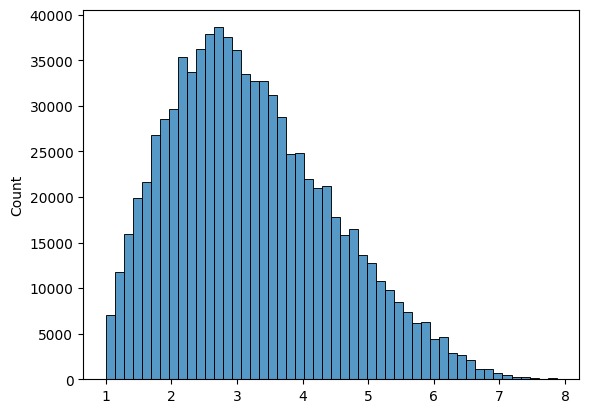

In [60]:
sn.histplot(arr[arr<8], bins = 50)
plt.show()